In [2]:
import os
import numpy as np
from matplotlib import pyplot
import csv
import pandas as pd

In [3]:
# Leer datos
data=pd.read_csv('D:/Trabajos/dataset/consolidado_covid_19-mun_se.csv', delimiter=',')
df=pd.DataFrame(data)
X, y=df['CONFIRMADOS'],df['RECUPERADOS(*)']

m = y.size
print(m)

6144


In [4]:
print(y,"\n")

0        1
1        0
2        0
3       85
4       48
        ..
6139    32
6140     4
6141     0
6142    10
6143     0
Name: RECUPERADOS(*), Length: 6144, dtype: int64 



In [5]:
def graficarDatos(x,y):
  fig = pyplot.figure()
  pyplot.plot(x,y, 'ro')
  pyplot.xlabel('CASOS CONFIRMADOS')
  pyplot.ylabel('RECUPERADOS')

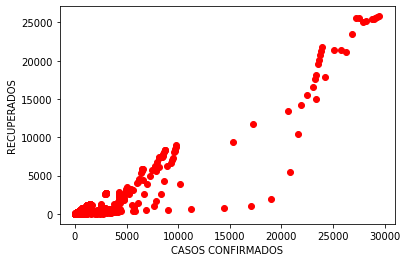

In [6]:
graficarDatos(X,y)

In [7]:
# No olvidarse agregar unos a la matriz de x
#X = np.stack([np.ones(m), y], axis=1)
X = np.stack([np.ones(m), X], axis=1)

In [8]:
X

array([[ 1., 14.],
       [ 1.,  1.],
       [ 1.,  1.],
       ...,
       [ 1.,  7.],
       [ 1., 10.],
       [ 1.,  7.]])

In [9]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [10]:
print(m)

6144


In [11]:
theta=np.array([0.1, 0.001])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1   0.001] se obtiene un costo de: 1180581.4579880028


In [12]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [16]:
theta = np.zeros(2)

num_ite = 60
alpha = 0.003

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [-1.86816965e+240 -2.11582928e+244]
con un costo de: inf 


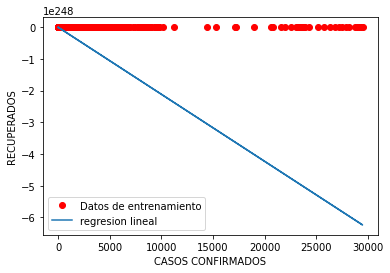

In [17]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [18]:
y_pred = np.dot([1, 18.3], theta)
print(y_pred)

-3.8719862731410425e+245
